https://data.wprdc.org/dataset/monthly-criminal-activity-dashboard/resource/bd41992a-987a-4cca-8798-fbe1cd946b07
criminal activity

https://data.wprdc.org/dataset/pittsburgh-parking-authority-meter-areas/resource/c4571554-aaf1-4d02-9739-60a78875bb1d Parking Meter Zones

https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh/resource/8d76ac6b-5ae8-4428-82a4-043130d17b02 Fire Incidents

# Criminal Activity
The dataset of Monthly Criminal Activity contains data about police reports. Each row in the dataset includes the date, neighborhood, and type of crime, among many other statistics. We will analyze this dataset to see which neighborhoods have the highest crime rates. 

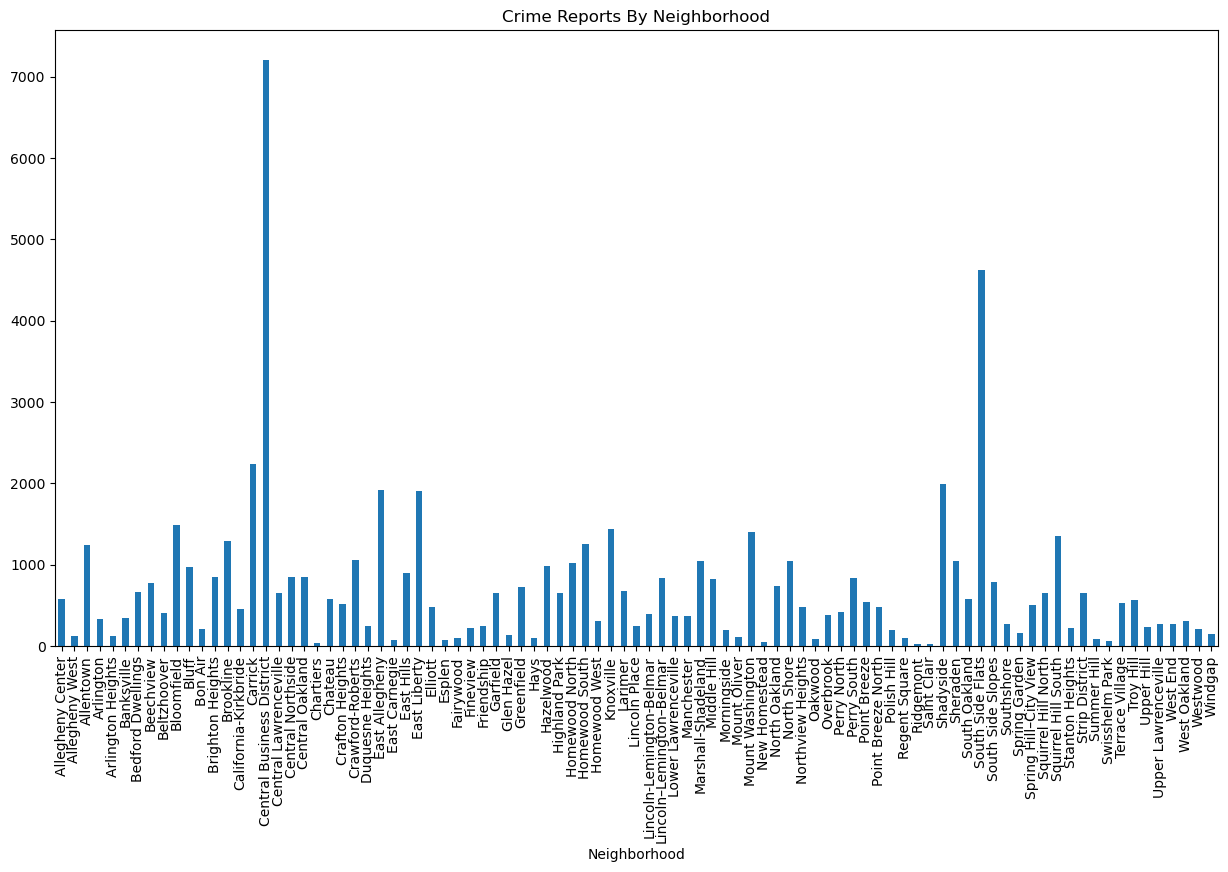

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

crime = pd.read_csv("crime.csv", low_memory=False)
#crime.pivot(columns="Neighborhood", values="NIBRS_Offense_Category")

crime.groupby("Neighborhood").count()["NIBRS_Offense_Category"].plot(title="Crime Reports By Neighborhood",kind="bar", figsize=(15,8))
plt.show()
#.count().plot(kind="bar", figsize=(10,10))
# crime.plot(x="Neighborhood", kind="bar", figsize=(10,10))
# plt.show()

This graph looks a little odd, but it shows the overall number of reports by neighborhood. Here, the leaders are the Central Business District and South Side Flats. It's hard to tell which neighborhoods have the least, though, so let's get a count:

In [2]:
sorted_crime = crime.groupby("Neighborhood").count()["NIBRS_Offense_Category"].sort_values()
sorted_crime

Neighborhood
Saint Clair                    25
Ridgemont                      33
Chartiers                      38
New Homestead                  54
Swisshelm Park                 66
                             ... 
East Allegheny               1915
Shadyside                    1992
Carrick                      2241
South Side Flats             4622
Central Business District    7209
Name: NIBRS_Offense_Category, Length: 91, dtype: int64

That's better. Now, we can see that from the raw data alone, Saint Clair has the fewest crime reports, followed by Ridgemont and Chartiers.

In [3]:
#creating an array of all the neighborhood names
neighborhoods = crime.pivot(columns="Neighborhood").columns
new_neighborhoods = []
for i in range(len(neighborhoods[1:])):
    if '_id' in neighborhoods[i]:
        new_neighborhoods.append(neighborhoods[i][1])
neighborhoods = new_neighborhoods[1:]

But, some crimes are way worse than others, and way more indicative of safety. Let's see if we can look at the categories of crime and sort by that.

In [4]:
# ok i originally tested this code with just Saint Clair, so all the variables are named either "sc" or "saint_clair" because of that
sc_crimes_dict = {}
specific_dict = {}
for i in neighborhoods:
    num = sorted_crime[i]
    newdict = {}
    saint_clair = crime.pivot(columns="Neighborhood", values="NIBRS_Offense_Category")[i]
    for index in saint_clair:
        if str(index) != "nan":
            if str(index) not in sc_crimes_dict:
                sc_crimes_dict[str(index)] = 1
            else:
                sc_crimes_dict[str(index)] += 1
            if str(index) not in newdict:
                newdict[str(index)] = 1
            else:
                newdict[str(index)] += 1
    specific_dict[i] = newdict
specific_dict #categorizes every neighborhood by type of crime
sc_crimes_dict #shows all types of crime

{'Larceny/Theft Offenses': 11404,
 'Drug/Narcotic Offenses': 5905,
 'Not NIBRS Reportable': 11769,
 'Destruction/Damage/Vandalism of Property': 5098,
 'Weapon Law Violations': 1345,
 'All other Offenses': 10245,
 'Assault Offenses': 10987,
 'Motor Vehicle Theft': 2035,
 'Fraud Offenses': 3358,
 'Burglary/Breaking & Entering': 1482,
 'Robbery': 790,
 'Kidnapping/Abduction': 145,
 'Arson': 208,
 'Human Trafficking': 7,
 'Homicide Offenses': 71}

Those are all the categories of crime. Let's see how many violent crimes took place in each neighborhood:

In [5]:
# creating a dictionary of dictionaries for violent crimes to turn into a dataframe
vc = {}
violent_crimes_list = ["Homicide Offenses", "Human Trafficking", "Arson", "Kidnapping/Abduction", "Assault Offenses", "Robbery", "Motor Vehicle Theft", "Larceny/Theft Offenses"]
for j in violent_crimes_list:
    vc[j] = {}
    for i in neighborhoods:
        if j in specific_dict[i]:
            vc[j][i] = specific_dict[i][j]
        else:
            vc[j][i] = 0
violent_crimes = pd.DataFrame(vc)
violent_crimes


,Homicide Offenses,Human Trafficking,Arson,Kidnapping/Abduction,Assault Offenses,Robbery,Motor Vehicle Theft,Larceny/Theft Offenses
Allegheny Center,0,0,1,2,83,7,7,57
Allegheny West,0,0,0,0,14,2,3,17
Allentown,2,1,0,6,246,18,34,253
Arlington,0,0,1,0,61,0,10,55
Arlington Heights,1,0,1,0,46,5,2,10
...,...,...,...,...,...,...,...,...
Upper Lawrenceville,0,0,0,0,52,1,11,47
West End,1,0,0,2,48,1,8,26
West Oakland,0,0,1,2,78,3,12,34
Westwood,0,0,1,0,32,1,11,52


Look at the nice dataframe!!! Let's see a graph of all the violent crimes by neighborhood. 

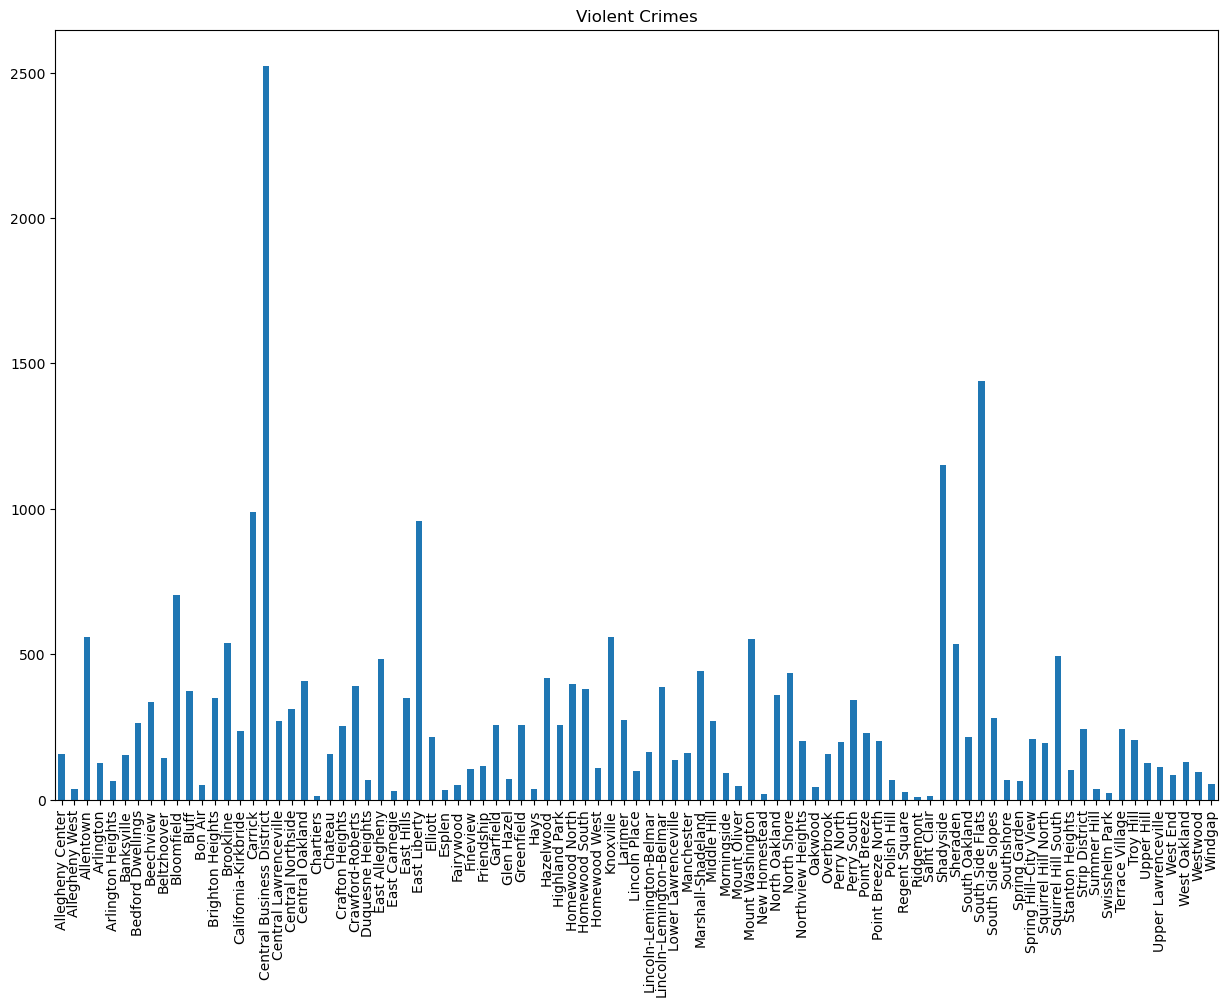

In [6]:
newdf = 0
for i in violent_crimes_list:
    newdf = newdf + violent_crimes[i]
newdf.plot(title="Violent Crimes", subplots=False,kind="bar",legend=False, figsize=(15, 10))
plt.show()

It looks ... pretty much the same as the first one. Big whoop.

In [7]:
sorted_newdf = newdf.sort_values()
sorted_newdf

Ridgemont                       8
Saint Clair                    13
Chartiers                      14
New Homestead                  19
Swisshelm Park                 22
                             ... 
East Liberty                  960
Carrick                       991
Shadyside                    1152
South Side Flats             1440
Central Business District    2521
Length: 91, dtype: int64

But, if we look at the sorted list, we see that Ridgemont is actually the safest neighborhood in terms of violent crime, followed by Saint Clair and Chartiers. Nice!

# Parking 
The dataset of parking meters contains data about parking meters in Pittsburgh. Each row in the dataset includes the area, hours, parking length and rates. We will analyze this dataset to see which neighborhoods has the best bang for your buck when it comes to parking.

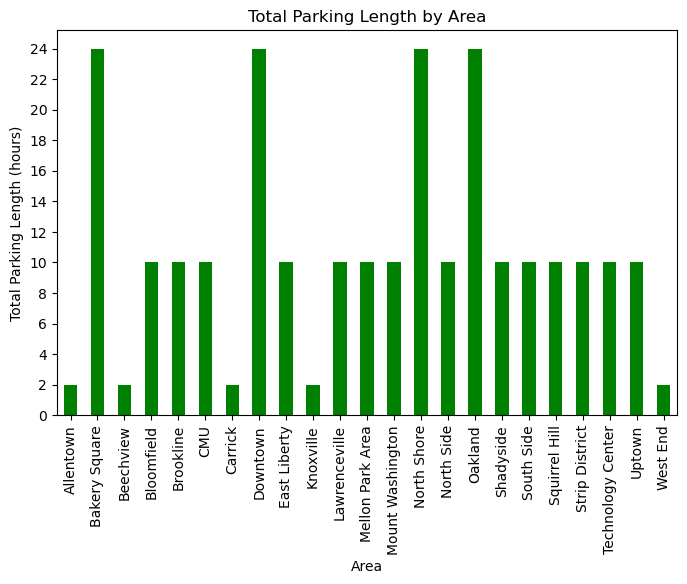

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("Parkingmeters.csv")

def convert_parkinglen(x):
    if "unlimited" in x.lower():
        return 24
    else:
        x_lower = str(x).lower()
        return float(x_lower.split()[0])

data['parkinglen_numeric'] = data['parkinglen'].apply(convert_parkinglen)
grouped = data.groupby('area')['parkinglen_numeric'].first()
grouped.plot.bar(title="Total Parking Length by Area", color='green', figsize=(8,5))
plt.xlabel("Area")
plt.yticks(np.arange(0, 25, 2)) 
plt.ylabel("Total Parking Length (hours)")
plt.show()


The following bar graph organizes each area in the dataset by total parking length. Most values fell into three catagories: 2 hour parking, 10 hour parking and 24 hour parking (unlimited parking). With this data, we can find out which areas have the best parking length, however this graph can be hard to read.

In [9]:
import pandas as pd

data = pd.read_csv("Parkingmeters.csv")
dic = {}
def convert_parkinglen(x):
    if "unlimited" in x.lower():
        strx = '24 Hours'
        return strx
    else:
        x_str = x
        return x_str
for index, row in data.iterrows():
    area = row['area']
    hours = convert_parkinglen(row['parkinglen'])
    if area not in dic:
        dic[area] = []
        dic[area].append(hours)

for area, hours_list in dic.items():
    print(area + ":", *hours_list)


North Side: 10 Hours
North Shore: 24 Hours
Downtown: 24 Hours
Mount Washington: 10 Hours
South Side: 10 Hours
Uptown: 10 Hours
Brookline: 10 Hours
CMU: 10 Hours
Shadyside: 10 Hours
Oakland: 24 Hours
Squirrel Hill: 10 Hours
East Liberty: 10 Hours
Bloomfield: 10 Hours
Lawrenceville: 10 Hours
Technology Center: 10 Hours
Strip District: 10 Hours
Mellon Park Area: 10 Hours
Allentown: 2 Hours
West End: 2 Hours
Beechview: 2 Hours
Knoxville: 2 Hours
Bakery Square: 24 Hours
Carrick: 2 Hours


To see our data better, we organized the dataset through a dictonary to assign each area to its hour value before printing it out. In this way, each area had its value neatly assigned to it and printed out for data anaylsis

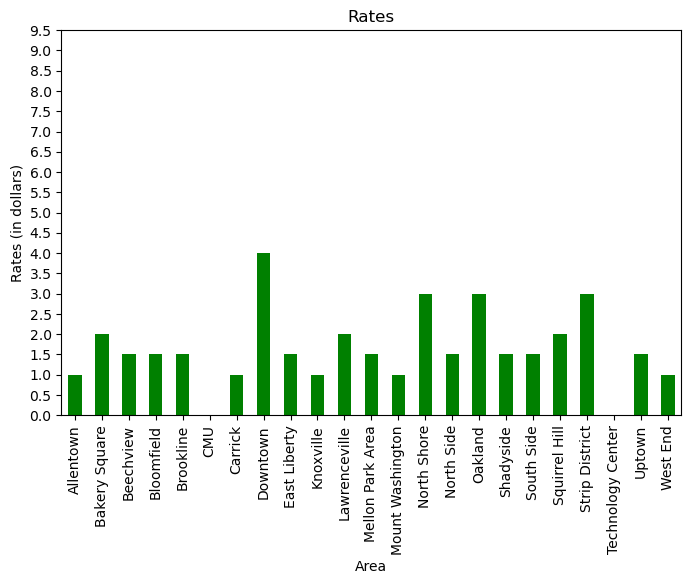

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("Parkingmeters.csv")

def convert_parkinglen(x):
    if "dynamic" in x.lower():
        return 0
    else:
        x_str = str(x).replace('$', '')
        return float(x_str)
        
data['parkinglen_numeric'] = data['rates'].apply(convert_parkinglen)
grouped = data.groupby('area')['parkinglen_numeric'].first()
grouped.plot.bar(title="Rates", color='green', figsize=(8,5))
plt.xlabel("Area")
plt.yticks(np.arange(0, 10, .5)) 
plt.ylabel("Rates (in dollars)")
plt.show()


Looking now at cost, the following bar graph organizes each area in the dataset by parking rates. With this data, we can find out which areas have the best parking rate, however this graph can be hard to read.

In [12]:
import pandas as pd

data = pd.read_csv("Parkingmeters.csv")
dic = {}
def convert_parkinglen(x):
    if "dynamic" in x.lower():
        strx = '$0.00'
        return strx
    else:
        x_str = x
        return x_str
for index, row in data.iterrows():
    area = row['area']
    hours = convert_parkinglen(row['rates'])
    if area not in dic:
        dic[area] = []
        dic[area].append(hours)

for area, hours_list in dic.items():
    print(area + ":", *hours_list)


North Side: $1.50
North Shore: $3.00
Downtown: $4.00
Mount Washington: $1.00
South Side: $1.50
Uptown: $1.50
Brookline: $1.50
CMU: $0.00
Shadyside: $1.50
Oakland: $3.00
Squirrel Hill: $2.00
East Liberty: $1.50
Bloomfield: $1.50
Lawrenceville: $2.00
Technology Center: $0.00
Strip District: $3.00
Mellon Park Area: $1.50
Allentown: $1.00
West End: $1.00
Beechview: $1.50
Knoxville: $1.00
Bakery Square: $2.00
Carrick: $1.00


Just like with parking length to better see our data, we organized the dataset through a dictonary to assign each area to its parking rate before printing it out. In this way, each area had its value neatly assigned to it and printed out for data anaylsis. It is important to note that any value labeled dynamic is assigned a value of 0 as we have no idea what it could be.

In [15]:
import pandas as pd

data = pd.read_csv("Parkingmeters.csv")
dic = {}
def convert_parkinglen(x):
    if "unlimited" in x.lower():
        strx = '24 Hours'
        return strx
    else:
        x_str = x
        return x_str
for index, row in data.iterrows():
    area = row['area']
    hours = convert_parkinglen(row['parkinglen'])
    if area not in dic:
        dic[area] = []
        dic[area].append(hours)


# ****** MIA'S CODE *******************
best_hours_list = []
# ***************************

for area, hours_list in dic.items():
    curr = hours_list[0]
    if(curr == '24 Hours'):
        print(area + ":", *hours_list)
        # ********* MIA'S CODE **************
        best_hours_list.append(area)
        #*****************

North Shore: 24 Hours
Downtown: 24 Hours
Oakland: 24 Hours
Bakery Square: 24 Hours


Looking at our data, we want to isolate the most optimal values in order to determine what area is the "best". To do this, we looked at the areas that allowed for unlimted parking and filtered only for those values.

In [16]:
import pandas as pd

data = pd.read_csv("Parkingmeters.csv")
dic = {}
def convert_parkinglen(x):
    if "unlimited" in x.lower():
        strx = '24 Hours'
        return strx
    else:
        x_str = x
        return x_str
for index, row in data.iterrows():
    area = row['area']
    hours = convert_parkinglen(row['rates'])
    if area not in dic:
        dic[area] = []
        dic[area].append(hours)


# ********** MIA'S CODE *****************
best_rates_list = []
# ********************************



for area, hours_list in dic.items():
    curr = hours_list[0]
    if(curr == '$2.00'):
        print(area + ":", *hours_list)
        # *************** MIA'S CODE **********************
        best_rates_list.append(area)
        # *****************************************

Squirrel Hill: $2.00
Lawrenceville: $2.00
Bakery Square: $2.00


In a similar manner, we appiled it to rates. However, when looking at the data for 1.00 dollar in a hour, it was clear there was no overlap between parking length and rates, thus we had to keep testing the rate with higher values until we found overlap with parking 

# INSERT FIRE INCIDINCES BETWEEN THIS CELL AND THE OVERALL BEST CELL BELOW

In [18]:
# here

# Overall Best Neighborhood

In [47]:
# bruh bakery square barely counts as a neighborhood, it's not in my list :(
best_crime = str(sorted_newdf.index[0])

for i in best_rates_list:
    for j in best_hours_list:
        if i == j:
            best_parking = i

print(best_parking)

Bakery Square


# Conclusions so far:
Bakery Square isn't a neighborhood in the crimes database, and the way the parking data is organized means we will have to work together to figure out another way to pick a good neighborhood that isn't bakery square. Coming up with ideas. No fire data yet.

In [53]:
incredible_dict = {}
for i in range(len(sorted_newdf.index)):
    for j in best_rates_list:
        if j in str(sorted_newdf.index[i]):
            incredible_dict[j] = i
    for j in best_hours_list:
        if j in str(sorted_newdf.index[i]):
            incredible_dict[j] = i

incredible_dict

{'Lawrenceville': 60, 'Oakland': 74, 'Squirrel Hill': 79, 'North Shore': 76}

Ok. I created a dictionary of the neighborhoods that were in the two lists that Andrew created in the end and their respective ranks in the crime dictionary, with 1 being the best and 91 being the worst. Suffice it to say, all of the viable options for the best parking neighborhood rank quite low in the crime list, so we will need to look at the fire list when Madelyn publishes it to get a better idea of what is the best. 

In [54]:
sorted_newdf.index

Index(['Ridgemont', 'Saint Clair', 'Chartiers', 'New Homestead',
       'Swisshelm Park', 'Regent Square', 'East Carnegie', 'Esplen',
       'Allegheny West', 'Summer Hill', 'Hays', 'Oakwood', 'Mount Oliver',
       'Fairywood', 'Bon Air', 'Windgap', 'Arlington Heights', 'Spring Garden',
       'Polish Hill', 'Duquesne Heights', 'Southshore', 'Glen Hazel',
       'West End', 'Morningside', 'Westwood', 'Lincoln Place',
       'Stanton Heights', 'Fineview', 'Homewood West', 'Upper Lawrenceville',
       'Friendship', 'Arlington', 'Upper Hill', 'West Oakland',
       'Lower Lawrenceville', 'Beltzhoover', 'Banksville', 'Allegheny Center',
       'Chateau', 'Overbrook', 'Manchester', 'Lincoln-Lemington-Belmar',
       'Squirrel Hill North', 'Perry North', 'Point Breeze North',
       'Northview Heights', 'Troy Hill', 'Spring Hill–City View', 'Elliott',
       'South Oakland', 'Point Breeze', 'California-Kirkbride',
       'Strip District', 'Terrace Village', 'Crafton Heights', 'Garfield',
 

guys our data isn't dating